In [ ]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from google.colab import files
import matplotlib.ticker as tkr


def latexify():
    import matplotlib
    params = {'backend': 'svg',
              'axes.labelsize':  8,
              'font.size':       8,
              'legend.fontsize': 8,
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'font.family': 'DejaVu Serif',
              'font.serif': 'Computer Modern',
             }
    matplotlib.rcParams.update(params)


def RODE(x,t,x1,x2,p1,p2,gamma,delta,c):
  s1 , a1, s2, a2 , c1 , c2 = x
  C = c-c1-c2
  g1 , g2 , g3 , g4 = gamma
  return [
      x1 - g2*s1*a1 - g1*s1*C - delta*s1,
      x2 - g2*s1*a1 - delta*a1,
      p1 - g4*s2*a2 - g3*s2*C - delta*s2,
      p2 - g4*s2*a2 - delta*a2,
      g1*s1*C - delta*c1,
      g3*s2*C - delta*c2
  ]

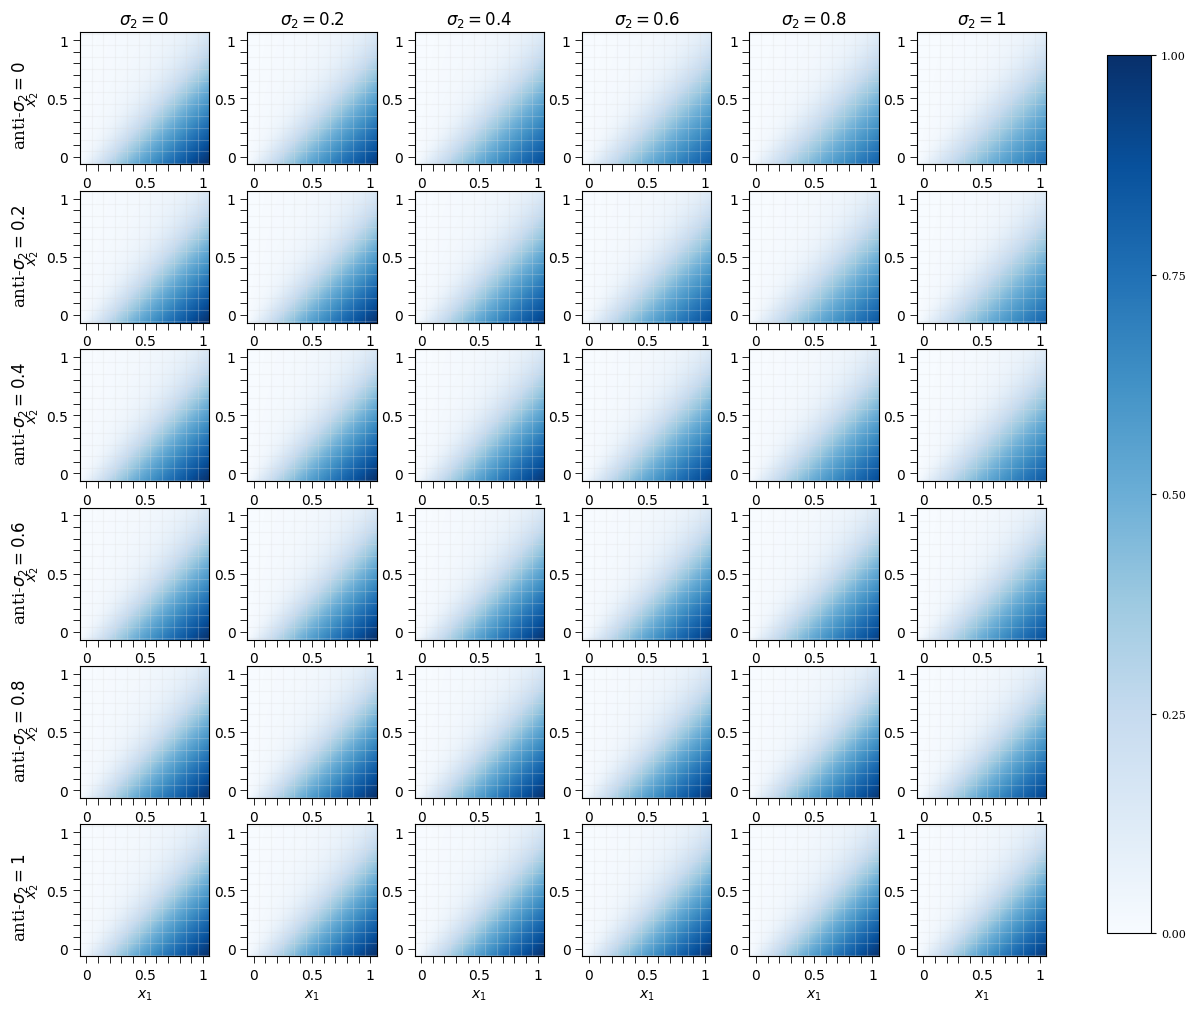

In [ ]:
p1range = 6
p2range = 6
x1range = 51
x2range = 51
p1 = np.linspace(0,1,p1range)
p2 = np.linspace(0,1,p2range)
x1 = np.linspace(0,1,x1range,endpoint=True)
x2 = np.linspace(0,1,x2range,endpoint=True)
ct = 1

gamma = [1,100,1,100]
delta = 1

x0 = np.zeros(6)
t = np.linspace(0,100,1000)



Y = np.zeros((p1range,p2range,x1range,x2range))

for i in range(p1range):
  for j in range(p2range):
    for k in range(x1range):
      for l in range(x2range):
          X = scipy.integrate.odeint(RODE,x0,t,args=(x1[k],x2[l],p1[i],p2[j],gamma,delta,ct))
          Y[j,i,x2range-1-l,k] = X[-1,4]
max = Y.max()

fig , axs = plt.subplots(p1range,p2range,figsize=(15.75,12))
latexify()

for i in range(p1range):
  for j in range(p2range):
    Yp = np.hstack((Y[j,i,:,:],np.zeros((x1range,1))))
    Yp[0,-1] = max
    Yp /= max
    im = axs[j,i].imshow(Yp,cmap = 'Blues')
    if j==(p2range - 1): axs[j,i].set_xlabel('$x_1$')
    axs[j,i].set_xticklabels('')
    gaps = np.repeat(a='',repeats=4)
    axs[j,i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
    axs[j,i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
    axs[j,i].set_xticklabels(ticks,minor=True)
    axs[j,i].set_xlim([-0,50])
    if i==0: axs[j,i].set_ylabel('$x_2$')
    axs[j,i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
    axs[j,i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
    axs[j,i].set_yticklabels('')
    axs[j,i].set_yticklabels(ticks,minor=True)
    axs[j,i].tick_params(axis='both', which='major', length=0)
    axs[j,i].tick_params(axis='both', which='minor', length=5)
    if j==0: axs[j,i].set_title('$\sigma_2 = {:1g}$'.format(p1[i]),size=12)
    if i==0: axs[j,i].text(-27,42.5,'anti-$\sigma_2 = {:1g}$'.format(p2[j]), rotation=90,size = 12)
    axs[j,i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
    #plt.colorbar(im,ax = axs[j,i])
cbar = fig.colorbar(im,ax=axs.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,1,5))
plt.savefig('c1array_ct1_delta1,g1g31,g2g4100.svg')

In [ ]:
p1range = 6
p2range = 6
p1 = np.linspace(0,1,p1range)
p2 = np.linspace(0,1,p2range)
x1 = np.linspace(0,1,11)
x2 = np.linspace(0,1,11)
ct = 1

gamma = [1,100,1,100]
delta = 1

x0 = np.zeros(6)
t = np.linspace(0,100,1000)


fig , axs = plt.subplots(p1range,p2range,figsize=(16,12))
latexify()

Y = np.zeros((p1range,p2range,11,11))

for i in range(p1range):
  for j in range(p2range):
    for k in range(11):
      for l in range(11):
          X = scipy.integrate.odeint(RODE,x0,t,args=(x1[k],x2[l],p1[i],p2[j],gamma,delta,ct))
          Y[j,i,10-l,k] = X[-1,5]
max = Y.max()

for i in range(p1range):
  for j in range(p2range):
    Yp = np.hstack((Y[j,i,:,:],np.zeros((11,1))))
    Yp[0,-1] = max
    im = axs[j,i].imshow(Yp,cmap = 'Blues')
    if j==(p2range - 1): axs[j,i].set_xlabel('$x_1$')
    gaps = np.repeat(a='',repeats=4)
    axs[j,i].set_xticks(range(11))
    ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
    axs[j,i].set_xticklabels(ticks)
    axs[j,i].set_xlim([-0.5,10.5])
    if i==0: axs[j,i].set_ylabel('$x_2$')
    axs[j,i].set_yticks(range(11))
    ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
    axs[j,i].set_yticklabels(ticks)
    axs[j,i].tick_params(axis='both', which='both', length=5)
    if j==0: axs[j,i].set_title('$\sigma_2 = {:.1f}$'.format(p1[i]),size=12)
    if i==0: axs[j,i].text(-7.0,8.5,'anti-$\sigma_2 = {:.1f}$'.format(p2[j]), rotation=90,size = 12)
    #plt.colorbar(im,ax = axs[j,i])
cbar = fig.colorbar(im,ax=axs.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,max,7))

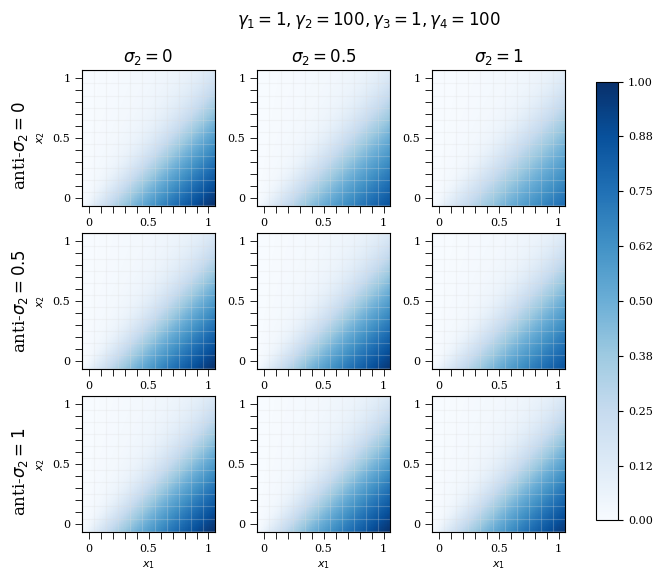

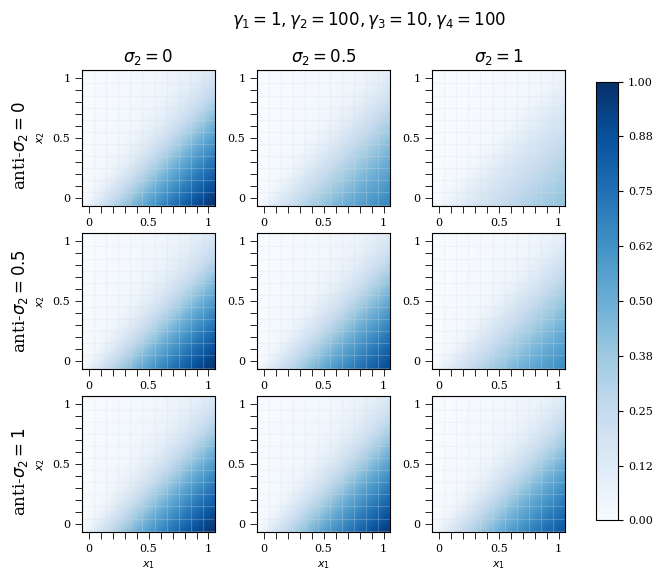

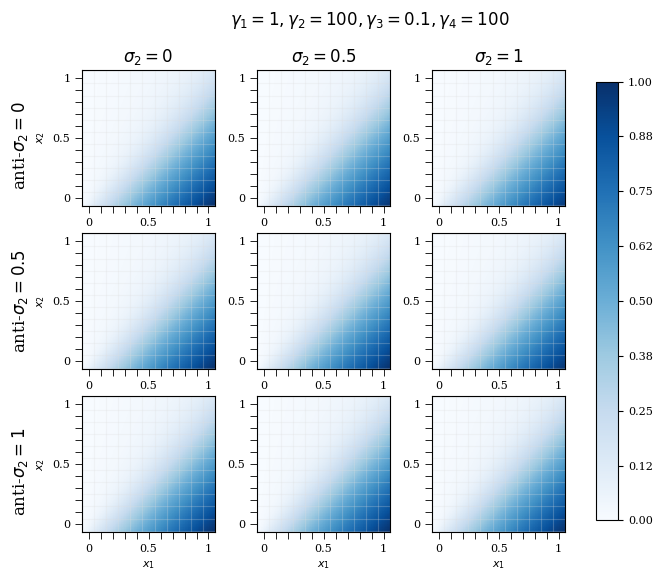

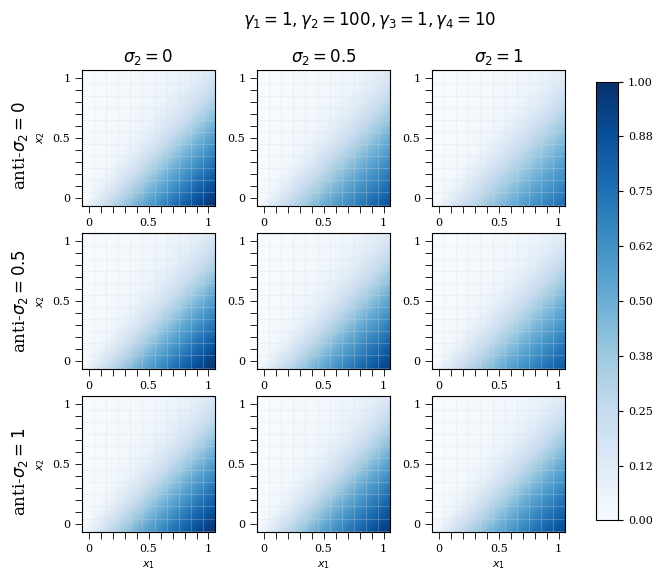

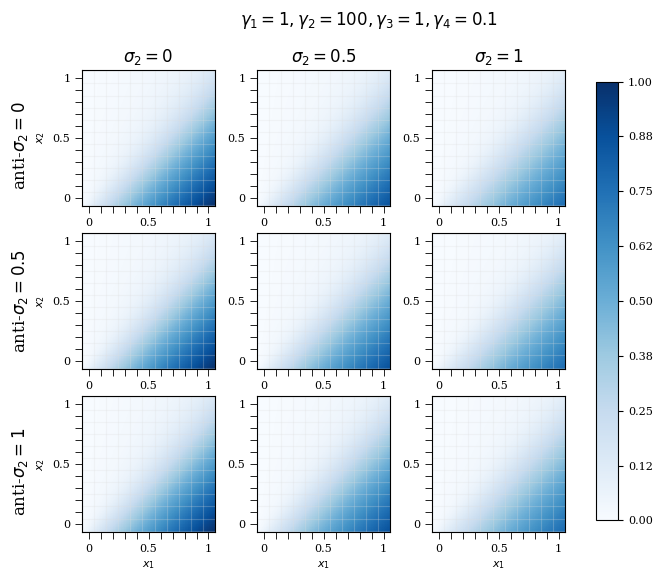

In [ ]:
def gamma_checker(tinf,x1range,x2range,p1range,p2range,gamma,delta,ct):
  p1 = np.linspace(0,1,p1range)
  p2 = np.linspace(0,1,p2range)
  x1 = np.linspace(0,1,x1range)
  x2 = np.linspace(0,1,x2range)

  fig , axs = plt.subplots(p1range,p2range,figsize=(8,6))
  latexify()

  Y = np.zeros((p1range,p2range,x1range,x2range))
  x0 = np.zeros(6)
  t = np.linspace(0,100,tinf)

  for i in range(p1range):
    for j in range(p2range):
      for k in range(x1range):
        for l in range(x2range):
            X = scipy.integrate.odeint(RODE,x0,t,args=(x1[k],x2[l],p1[i],p2[j],gamma,delta,ct))
            Y[j,i,x2range-1-l,k] = X[-1,4]
  max = Y.max()

  for i in range(p1range):
    for j in range(p2range):
      Yp = np.hstack((Y[j,i,:,:],np.zeros((x1range,1))))
      Yp[0,-1] = max
      Yp /= max
      im = axs[j,i].imshow(Yp,cmap = 'Blues')
      if j==(p2range - 1): axs[j,i].set_xlabel('$x_1$')
      axs[j,i].set_xticklabels('')
      gaps = np.repeat(a='',repeats=4)
      axs[j,i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
      axs[j,i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
      ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
      axs[j,i].set_xticklabels(ticks,minor=True)
      axs[j,i].set_xlim([-0,50])
      if i==0: axs[j,i].set_ylabel('$x_2$')
      axs[j,i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
      axs[j,i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
      ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
      axs[j,i].set_yticklabels('')
      axs[j,i].set_yticklabels(ticks,minor=True)
      axs[j,i].tick_params(axis='both', which='major', length=0)
      axs[j,i].tick_params(axis='both', which='minor', length=5)
      if j==0: axs[j,i].set_title('$\sigma_2 = {:1g}$'.format(p1[i]),size=12)
      if i==0: axs[j,i].text(-27,42.5,'anti-$\sigma_2 = {:1g}$'.format(p2[j]), rotation=90,size = 12)
      axs[j,i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
      #plt.colorbar(im,ax = axs[j,i])
  cbar = fig.colorbar(im,ax=axs.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
  cbar.set_ticks(np.linspace(0,1,9))
  fig.suptitle('$\gamma_1={:g}, \gamma_2={:g}, \gamma_3={:g}, \gamma_4={:g}$'.format(gamma[0],gamma[1],gamma[2],gamma[3]),fontsize=12)
  plt.savefig('c1garray_g1{:g}g2{:g}g3{:g}g4{:g}.svg'.format(gamma[0],gamma[1],gamma[2],gamma[3]))
  r1 = gamma[0]/gamma[1]
  r2 = gamma[2]/gamma[3]
  #fig.suptitle('$r_1={:g}, r_2={:g}$'.format(r1,r2),fontsize=12)
  return

gamma = [1,100,1,100]
gamma_checker(1000,51,51,3,3,gamma,1,1)

gamma = [1,100,10,100]
gamma_checker(1000,51,51,3,3,gamma,1,1)

gamma = [1,100,0.1,100]
gamma_checker(1000,51,51,3,3,gamma,1,1)

gamma = [1,100,1,10]
gamma_checker(1000,51,51,3,3,gamma,1,1)

gamma = [1,100,1,0.1]
gamma_checker(1000,51,51,3,3,gamma,1,1)



In [ ]:
def R3ODE(x,t,x1,x2,Bias,gamma,delta,w,ct):
  S1,A1,C1,S2,A2,C2,S3,A3,C3 = x
  C = ct - C1 - C2 - C3
  b1,b2,b3 = Bias
  w1,w2 = w
  gamma1,gamma2,gamma3,gamma4,gamma5,gamma6 = gamma
  return [
      x1+x2-S1*delta - S1*A1*gamma2 - S1*C*gamma1,
      b1 - A1*delta - S1*A1*gamma2,
      S1*C*gamma1 - C1*delta,
      b2 - S2*delta - S2*A2*gamma4 - S2*C*gamma3,
      x1 + x2 - A2*delta - S2*A2*gamma4,
      S2*C*gamma3 - C2*delta,
      w1*C1+w2*C2 - S3*delta - S3*A3*gamma6 - S3*C*gamma5,
      b3 - S3*A3*gamma6 - A3*delta,
      S3*C*gamma5 - C3*delta
  ]


def cR3ODE(x,t,x1,x2,Bias,gamma,delta,w):
  S1,A1,S2,A2,S3,A3 = x
  b1,b2,b3 = Bias
  w1,w2 = w
  gamma1,gamma2,gamma3,gamma4,gamma5,gamma6 = gamma
  return [
      x1+x2-S1*delta - S1*A1*gamma2 ,
      b1 - A1*delta - S1*A1*gamma2,
      b2 - S2*delta - S2*A2*gamma4,
      x1 + x2 - A2*delta - S2*A2*gamma4,
      w1*S1+w2*S2 - S3*delta - S3*A3*gamma6,
      b3 - S3*A3*gamma6 - A3*delta
  ]

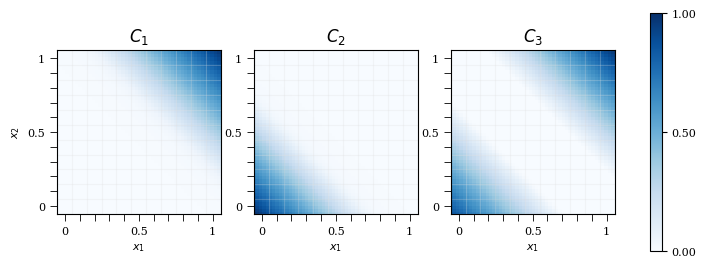

In [ ]:
x1range = 51
x2range = 51
x1 = np.linspace(0,1,x1range)
x2 = np.linspace(0,1,x2range)
bias = [1.2,0.7,0.15]
gamma = [10,1000,10,1000,10,1000]
w = [4,4]
delta = 1
ct = 5
x0 = np.zeros(6)
t = np.linspace(0,10,1000)
Y = np.zeros((3,x1range,x2range))

'''
for i in range(x1range):
  for j in range(x2range):
    X = scipy.integrate.odeint(R3ODE,x0,t,args=(x1[i],x2[j],bias,gamma,delta,w,ct))
    Y[0,x2range-1-j,i] = X[-1,2]
    Y[1,x2range-1-j,i] = X[-1,5]
    Y[2,x2range-1-j,i] = X[-1,8]
'''

for i in range(x1range):
  for j in range(x2range):
    X = scipy.integrate.odeint(cR3ODE,x0,t,args=(x1[i],x2[j],bias,gamma,delta,w))
    Y[0,x2range-1-j,i] = X[-1,0]
    Y[1,x2range-1-j,i] = X[-1,2]
    Y[2,x2range-1-j,i] = X[-1,4]



fig , ax = plt.subplots(1,3,figsize=(9,3.25))
latexify()

for i in range(3):
  Yp = np.hstack((Y[i,:,:],np.zeros((x1range,1))))
  Yp[0,-1] = Y[i,:,:].max()
  Yp = Yp/Yp[0,-1]
  im = ax[i].imshow(Yp,cmap = 'Blues')
  ax[i].set_xlim([-0,x1range-1])
  ax[i].set_xticklabels('')
  gaps = np.repeat(a='',repeats=4)
  ax[i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
  ax[i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
  ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
  ax[i].set_xticklabels(ticks,minor=True)
  ax[i].set_xlim([-0,50])
  ax[i].set_ylim([50,0])
  ax[i].set_xlabel('$x_1$')
  if i==0: ax[i].set_ylabel('$x_2$')
  ax[i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
  ax[i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
  ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
  ax[i].set_yticklabels('')
  ax[i].set_yticklabels(ticks,minor=True)
  ax[i].tick_params(axis='both', which='major', length=0)
  ax[i].tick_params(axis='both', which='minor', length=5)
  ax[i].set_title('$C_{:1g}$'.format(i+1),size=12)
  ax[i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
cbar = fig.colorbar(im,ax=ax.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,Yp[0,-1],3))
plt.savefig('BNN_3_unlimited.svg')


In [ ]:
def cR4ODE(x,t,x1,x2,bias,gamma,delta,w1,w2):
  S1,A1,S2,A2,S3,A3,S4,A4 = x
  b1,b2,b3,b4 = bias
  g1,g2,g3,g4 =gamma
  w11,w12,w21,w22,w31,w32 = w1
  w41,w42,w43 = w2
  return [
      b1 - S1*delta - S1*A1*g1,
      w11 * x1 + w12 * x2 - A1*delta - S1*A1*g1,
      w21 * x1 - S2*delta - S2*A2*g2,
      w22 * x2 + b2 - A2 * delta - S2 * A2 * g2,
      w32 * x2 - S3 * delta - S3 * A3 * g3,
      w31 * x1 + b3 - A3 * delta - S3 * A3 * g3,
      b4 - S4 * delta - S4 * A4 * g4,
      w41 * S1 + w42 * S2 + w43 * S3 - A4 * delta - S4 * A4 * g4
  ]


def R4ODE(x,t,x1,x2,bias,gamma,delta,w1,w2,ct):
  S1,A1,C1,S2,A2,C2,S3,A3,C3,S4,A4,C4 = x
  c = ct - C1 - C2 - C3 - C4
  b1,b2,b3,b4 = bias
  g1,g2,g3,g4,g5,g6,g7,g8 =gamma
  w11,w12,w21,w22,w31,w32 = w1
  w41,w42,w43 = w2
  return [
      b1 - S1*delta - S1*A1*g1 - S1*c*g2,
      w11 * x1 + w12 * x2 - A1*delta - S1*A1*g1,
      S1*c*g2 - C1*delta,
      w21 * x1 - S2*delta - S2*A2*g3 - S2*c*g4,
      w22 * x2 + b2 - A2 * delta - S2 * A2 * g3,
      S2*c*g4 - C2*delta,
      w32 * x2 - S3 * delta - S3 * A3 * g5 - S3*c*g6,
      w31 * x1 + b3 - A3 * delta - S3 * A3 * g5,
      S3*c*g6 - C3*delta,
      b4 - S4 * delta - S4 * A4 * g7 - S4*c*g8,
      w41 * C1 + w42 * C2 + w43 * C3 - A4 * delta - S4 * A4 * g7,
      S4*c*g8 - C4*delta
  ]



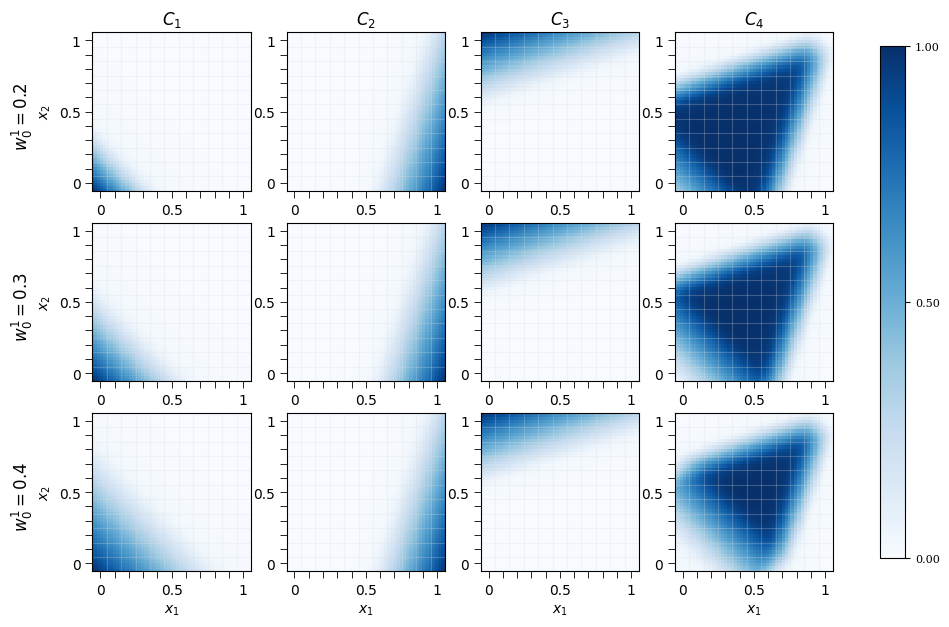

In [ ]:
x1range = 51
x2range = 51
x1 = np.linspace(0,1,x1range)
x2 = np.linspace(0,1,x2range)
bias = [0.0,0.8,0.8,0.3]
b1 = [0.2,0.3,0.4]
gamma = [1000,1000,1000,1000]
w1 = [0.5,0.5,1.5,0.5,0.5,1.5]
w2 = [1,1,1]
delta = 1
ct = 5
x0 = np.zeros(8)
t = np.linspace(0,10,1000)
Y = np.zeros((3,4,x1range,x2range))

for k in range(3):
  bias[0] = b1[k]
  for i in range(x1range):
    for j in range(x2range):
      X = scipy.integrate.odeint(cR4ODE,x0,t,args=(x1[i],x2[j],bias,gamma,delta,w1,w2))
      Y[k,0,x2range-1-j,i] = X[-1,0]
      Y[k,1,x2range-1-j,i] = X[-1,2]
      Y[k,2,x2range-1-j,i] = X[-1,4]
      Y[k,3,x2range-1-j,i] = X[-1,6]



fig , ax = plt.subplots(3,4,figsize=(12,7))
latexify()

for j in range(3):
  for i in range(4):
    Yp = np.hstack((Y[j,i,:,:],np.zeros((x1range,1))))
    Yp[0,-1] = Y[j,i,:,:].max()
    Yp = Yp/Yp[0,-1]
    im = ax[j,i].imshow(Yp,cmap = 'Blues')
    ax[j,i].set_xlim([-0,x1range-1])
    ax[j,i].set_xticklabels('')
    gaps = np.repeat(a='',repeats=4)
    ax[j,i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
    ax[j,i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
    ax[j,i].set_xticklabels(ticks,minor=True)
    ax[j,i].set_xlim([-0,50])
    ax[j,i].set_ylim([50,0])
    if j==2: ax[j,i].set_xlabel('$x_1$')
    if i==0: ax[j,i].set_ylabel('$x_2$')
    ax[j,i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
    ax[j,i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
    ax[j,i].set_yticklabels('')
    ax[j,i].set_yticklabels(ticks,minor=True)
    ax[j,i].tick_params(axis='both', which='major', length=0)
    ax[j,i].tick_params(axis='both', which='minor', length=5)
    if j==0 : ax[j,i].set_title('$C_{:1g}$'.format(i+1),size=12)
    if i==0: ax[j,i].text(-26,35,'$w_0^1 = {:1g}$'.format(b1[j]), rotation=90,size = 12)
    ax[j,i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
cbar = fig.colorbar(im,ax=ax.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,Yp[0,-1],3))
plt.savefig('BNN_4_unlimited.svg')

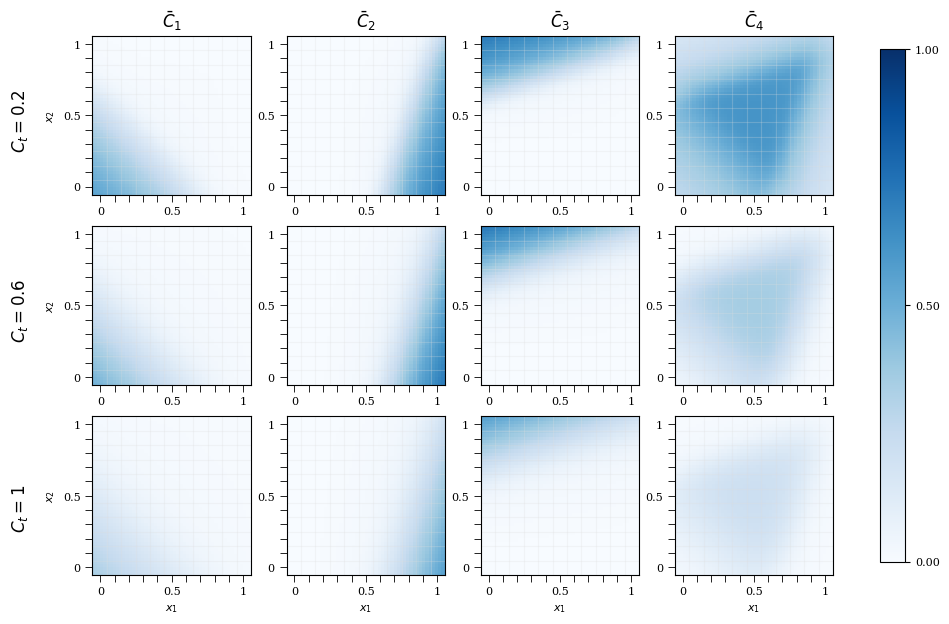

In [ ]:
x1range = 51
x2range = 51
x1 = np.linspace(0,1,x1range)
x2 = np.linspace(0,1,x2range)
bias = [0.4,0.8,0.8,0.3]
gamma = [1000,10,1000,10,1000,10,1000,10]
w1 = [0.5,0.5,1.5,0.5,0.5,1.5]
w2 = [1,1,1]
delta = 1
ct = [0.2,0.6,1]
x0 = np.zeros(12)
t = np.linspace(0,10,1000)
Y = np.zeros((3,4,x1range,x2range))

for k in range(3):
  for i in range(x1range):
    for j in range(x2range):
      X = scipy.integrate.odeint(R4ODE,x0,t,args=(x1[i],x2[j],bias,gamma,delta,w1,w2,ct[k]))
      Y[k,0,x2range-1-j,i] = X[-1,2]
      Y[k,1,x2range-1-j,i] = X[-1,5]
      Y[k,2,x2range-1-j,i] = X[-1,8]
      Y[k,3,x2range-1-j,i] = X[-1,11]



fig , ax = plt.subplots(3,4,figsize=(12,7))
latexify()

for j in range(3):
  for i in range(4):
    Yp = np.hstack((Y[j,i,:,:],np.zeros((x1range,1))))
    #Yp[0,-1] = Y[j,i,:,:].max()
    Yp = Yp/ct[j]
    Yp[0,-1] = 1
    im = ax[j,i].imshow(Yp,cmap = 'Blues')
    ax[j,i].set_xlim([-0,x1range-1])
    ax[j,i].set_xticklabels('')
    gaps = np.repeat(a='',repeats=4)
    ax[j,i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
    ax[j,i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
    ax[j,i].set_xticklabels(ticks,minor=True)
    ax[j,i].set_xlim([-0,50])
    ax[j,i].set_ylim([50,0])
    if j==2: ax[j,i].set_xlabel('$x_1$')
    if i==0: ax[j,i].set_ylabel('$x_2$')
    ax[j,i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
    ax[j,i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
    ax[j,i].set_yticklabels('')
    ax[j,i].set_yticklabels(ticks,minor=True)
    ax[j,i].tick_params(axis='both', which='major', length=0)
    ax[j,i].tick_params(axis='both', which='minor', length=5)
    if j==0 : ax[j,i].set_title('$\\bar C_{:1g}$'.format(i+1),size=12)
    if i==0: ax[j,i].text(-26,35,'$C_t = {:1g}$'.format(ct[j]), rotation=90,size = 12)
    ax[j,i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
cbar = fig.colorbar(im,ax=ax.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,Yp[0,-1],3))
plt.savefig('BNN_4_limited.svg')

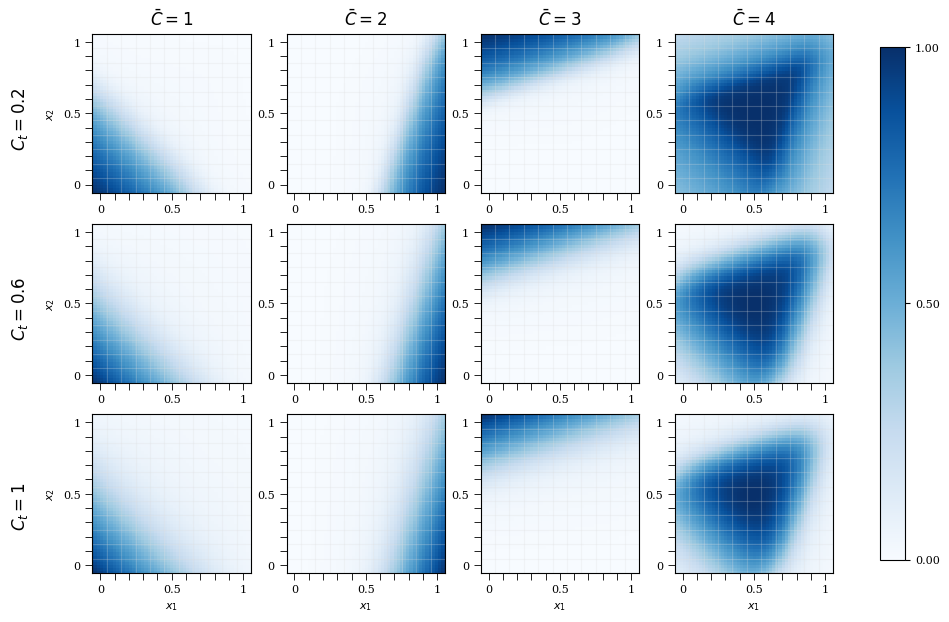

In [ ]:
fig , ax = plt.subplots(3,4,figsize=(12,7))
latexify()

for j in range(3):
  for i in range(4):
    Yp = np.hstack((Y[j,i,:,:],np.zeros((x1range,1))))
    #Yp[0,-1] = Y[j,i,:,:].max()
    Yp = Yp/Y[j,i,:,:].max()
    Yp[0,-1] = 1
    im = ax[j,i].imshow(Yp,cmap = 'Blues')
    ax[j,i].set_xlim([-0,x1range-1])
    ax[j,i].set_xticklabels('')
    gaps = np.repeat(a='',repeats=4)
    ax[j,i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
    ax[j,i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
    ax[j,i].set_xticklabels(ticks,minor=True)
    ax[j,i].set_xlim([-0,50])
    ax[j,i].set_ylim([50,0])
    if j==2: ax[j,i].set_xlabel('$x_1$')
    if i==0: ax[j,i].set_ylabel('$x_2$')
    ax[j,i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
    ax[j,i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
    ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
    ax[j,i].set_yticklabels('')
    ax[j,i].set_yticklabels(ticks,minor=True)
    ax[j,i].tick_params(axis='both', which='major', length=0)
    ax[j,i].tick_params(axis='both', which='minor', length=5)
    if j==0 : ax[j,i].set_title('$\\bar C = {:1g}$'.format(i+1),size=12)
    if i==0: ax[j,i].text(-26,35,'$C_t = {:1g}$'.format(ct[j]), rotation=90,size = 12)
    ax[j,i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
cbar = fig.colorbar(im,ax=ax.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,Yp[0,-1],3))

In [ ]:
def c2RODE(x,t,x1,x2,bias,gamma,delta,w1,w2,ct):
  S1, A1, C1, S2, A2, C2 = x
  b1 , b2 = bias
  g1 , g2 = gamma
  C = ct - C1 - C2
  w11, w12 = w1
  w21 , w22 = w2
  return[
      b1 + w11 * x1 - delta * S1 - g1 * S1 * A1 - g2 * S1 * C,
      w12 * x2 - delta * A1 - g1 * S1 * A1 ,
      g2 * S1 * C - delta * C1,
      w21 * x1 + w22 * x2 - delta*S2 - g1*S2*A2 - g2 * S2* C,
      b2 - delta * A2 - g1*S2 * A2,
      g2 * S2 * C - delta * C2
  ]

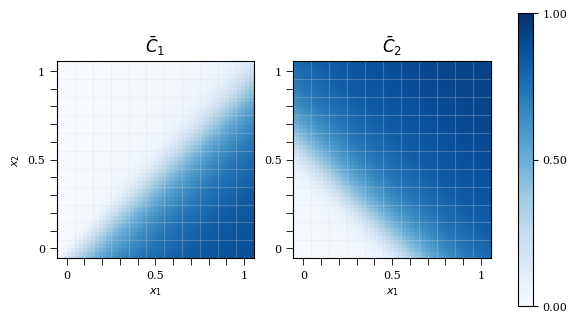

In [ ]:
x1range = 51
x2range = 51
x1 = np.linspace(0,1,x1range)
x2 = np.linspace(0,1,x2range)
bias = [0,0.5]
gamma = [1000,10]
w1 = [1,1]
w2 = [1,1]
delta = 1
ct = 0.2
x0 = np.zeros(6)
t = np.linspace(0,10,1000)
Y = np.zeros((2,x1range,x2range))


for i in range(x1range):
  for j in range(x2range):
    w1 = [1,1]
    w2 = [0,0]
    X = scipy.integrate.odeint(c2RODE,x0,t,args=(x1[i],x2[j],bias,gamma,delta,w1,w2,ct))
    Y[0,x2range-1-j,i] = X[-1,2]
    w2 = [1,1]
    w1 = [0,0]
    X = scipy.integrate.odeint(c2RODE,x0,t,args=(x1[i],x2[j],bias,gamma,delta,w1,w2,ct))
    Y[1,x2range-1-j,i] = X[-1,5]


fig , ax = plt.subplots(1,2,figsize=(7,4))
latexify()


for i in range(2):
  Yp = np.hstack((Y[i,:,:],np.zeros((x1range,1))))
  #Yp[0,-1] = Y[j,i,:,:].max()
  Yp = Yp/ct
  Yp[0,-1] = 1
  im = ax[i].imshow(Yp,cmap = 'Blues')
  ax[i].set_xlim([-0,x1range-1])
  ax[i].set_xticklabels('')
  gaps = np.repeat(a='',repeats=4)
  ax[i].set_xticks(np.linspace(0,x1range-1,num =12,endpoint=True))
  ax[i].set_xticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
  ticks = np.hstack(('0',gaps,'0.5',gaps,'1'))
  ax[i].set_xticklabels(ticks,minor=True)
  ax[i].set_xlim([-0,50])
  ax[i].set_ylim([50,0])
  ax[i].set_xlabel('$x_1$')
  if i==0: ax[i].set_ylabel('$x_2$')
  ax[i].set_yticks(np.linspace(0,x2range-1,num =12,endpoint=True))
  ax[i].set_yticks(np.linspace(2.5,x1range-3.5,num =11,endpoint=True),minor=True)
  ticks = np.hstack(('1',gaps,'0.5',gaps,'0'))
  ax[i].set_yticklabels('')
  ax[i].set_yticklabels(ticks,minor=True)
  ax[i].tick_params(axis='both', which='major', length=0)
  ax[i].tick_params(axis='both', which='minor', length=5)
  ax[i].set_title('$\\bar C_{:1g}$'.format(i+1),size=12)
  #if i==0: ax[j,i].text(-26,35,'$C_t = {:1g}$'.format(ct[j]), rotation=90,size = 12)
  ax[i].grid(which='major', color='#DDDDDD',alpha=0.25, linewidth=0.8)
cbar = fig.colorbar(im,ax=ax.ravel().tolist(), shrink=0.95,format=tkr.FormatStrFormatter('%.2f'))
cbar.set_ticks(np.linspace(0,Yp[0,-1],3))
plt.savefig('isolated_r0_01.svg')

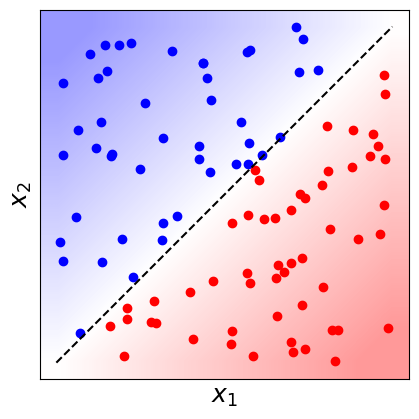

In [ ]:
np.random.seed(0)
X = np.random.uniform(size=(100,2))
X_1 = []
X_2 = []
for i in range(X.shape[0]):
  if X[i,1] >= X[i,0]:
    X_1.append(X[i,:])
  else:
    X_2.append(X[i,:])

X_1 = np.array(X_1)
X_2 = np.array(X_2)
x_point = [0,1]
y_point = [0,1]
plt.scatter(X_1[:,0],X_1[:,1],color='Blue')
plt.scatter(X_2[:,0],X_2[:,1],color='Red')
plt.plot(x_point,y_point, color = 'black', linestyle='dashed')
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
x, y = np.meshgrid(np.linspace(x0, x1, 10), np.linspace(y0, y1, 10))
z = ((x -y))
plt.imshow(z, cmap='bwr', vmin=-1, vmax=1, interpolation='bilinear', alpha=0.4,
           extent=[x0, x1, y0, y1], origin='lower')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.savefig('db_1.svg')


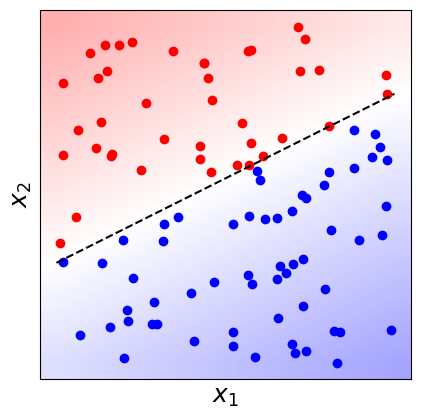

In [ ]:
np.random.seed(0)
X = np.random.uniform(size=(100,2))
X_1 = []
X_2 = []
for i in range(X.shape[0]):
  if X[i,1] <= 0.3 + 0.5* X[i,0]:
    X_1.append(X[i,:])
  else:
    X_2.append(X[i,:])

X_1 = np.array(X_1)
X_2 = np.array(X_2)
x_point = [0,1]
y_point = [0.3,0.8]
plt.scatter(X_1[:,0],X_1[:,1],color='Blue')
plt.scatter(X_2[:,0],X_2[:,1],color='Red')
plt.plot(x_point,y_point, color = 'black', linestyle='dashed')
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
x, y = np.meshgrid(np.linspace(x0, x1, 10), np.linspace(y0, y1, 10))
z = -(0.3 + (0.5*x -y))
plt.imshow(z, cmap='bwr', vmin=-1, vmax=1, interpolation='bilinear', alpha=0.4,
           extent=[x0, x1, y0, y1], origin='lower')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.savefig('db_2.svg')

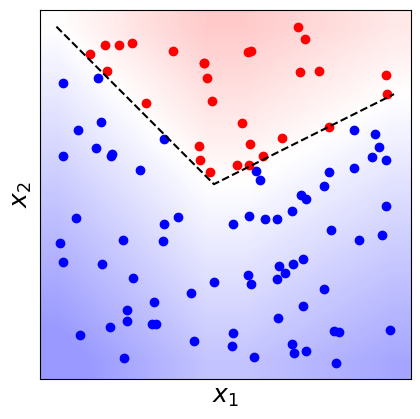

In [ ]:
np.random.seed(0)
X = np.random.uniform(size=(100,2))
X_1 = []
X_2 = []
for i in range(X.shape[0]):
  if X[i,1] >= 0.3 + 0.5* X[i,0] and X[i,1] >= 1 - X[i,0]:
    X_2.append(X[i,:])
  else:
    X_1.append(X[i,:])

X_1 = np.array(X_1)
X_2 = np.array(X_2)
x_point = [0,0.7/1.5,1]
y_point = [1,0.8/1.5,0.8]
plt.scatter(X_1[:,0],X_1[:,1],color='Blue')
plt.scatter(X_2[:,0],X_2[:,1],color='Red')
plt.plot(x_point,y_point, color = 'black', linestyle='dashed')
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
midpoint = 7/15
x_1, y_1 = np.meshgrid(np.linspace(x0, midpoint, 5), np.linspace(y0, y1, 10))
x_2, y_2 = np.meshgrid(np.linspace(midpoint,x1, 5), np.linspace(y0, y1, 10))

z_2 = -(0.3 + (0.5*x_2 -y_2) )
z_1 = -(1-(x_1+y_1))
z = np.concatenate((z_1,z_2),axis=1)
plt.imshow(z, cmap='bwr', vmin=-1, vmax=1, interpolation='bilinear', alpha=0.4,
           extent=[x0, x1, y0, y1], origin='lower')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.savefig('db_mix.svg')

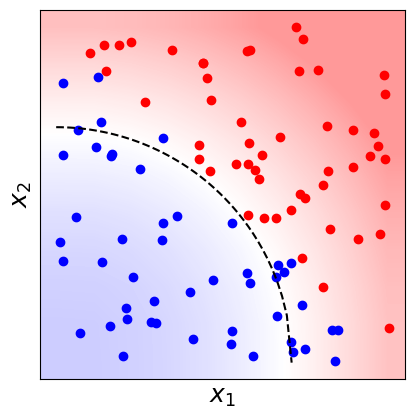

In [ ]:
np.random.seed(0)
X = np.random.uniform(size=(100,2))
X_1 = []
X_2 = []
for i in range(X.shape[0]):
  if X[i,1] <= 1 - X[i,0]:
    X_1.append(X[i,:])
  else:
    X_2.append(X[i,:])

X_1 = np.array(X_1)
X_2 = np.array(X_2)
R = 0.7
x_point = np.linspace(0,R,50)
y_point = np.sqrt(R**2-x_point**2)
plt.scatter(X_1[:,0],X_1[:,1],color='Blue')
plt.scatter(X_2[:,0],X_2[:,1],color='Red')
plt.plot(x_point,y_point, color = 'black', linestyle='dashed')
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
x, y = np.meshgrid(np.linspace(x0, x1, 10), np.linspace(y0, y1, 10))
z = -(R**2 - x**2 - y**2)
plt.imshow(z, cmap='bwr', vmin=-1, vmax=1, interpolation='bilinear', alpha=0.4,
           extent=[x0, x1, y0, y1], origin='lower')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.savefig('non_ideal_db.svg')